<a href="https://colab.research.google.com/github/anisbagwan/Mobile-Price-Range-Prediction-Capstone-Project/blob/main/Mobile_Price_Range_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

#Data Description -

* Battery_power - Total energy a battery can store in one time measured in mAh

* Blue - Has bluetooth or not

* Clock_speed - speed at which microprocessor executes instructions

* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are

* Three_g - Has 3G or not

* Touch_screen - Has touch screen or not

* Wifi - Has wifi or not

* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

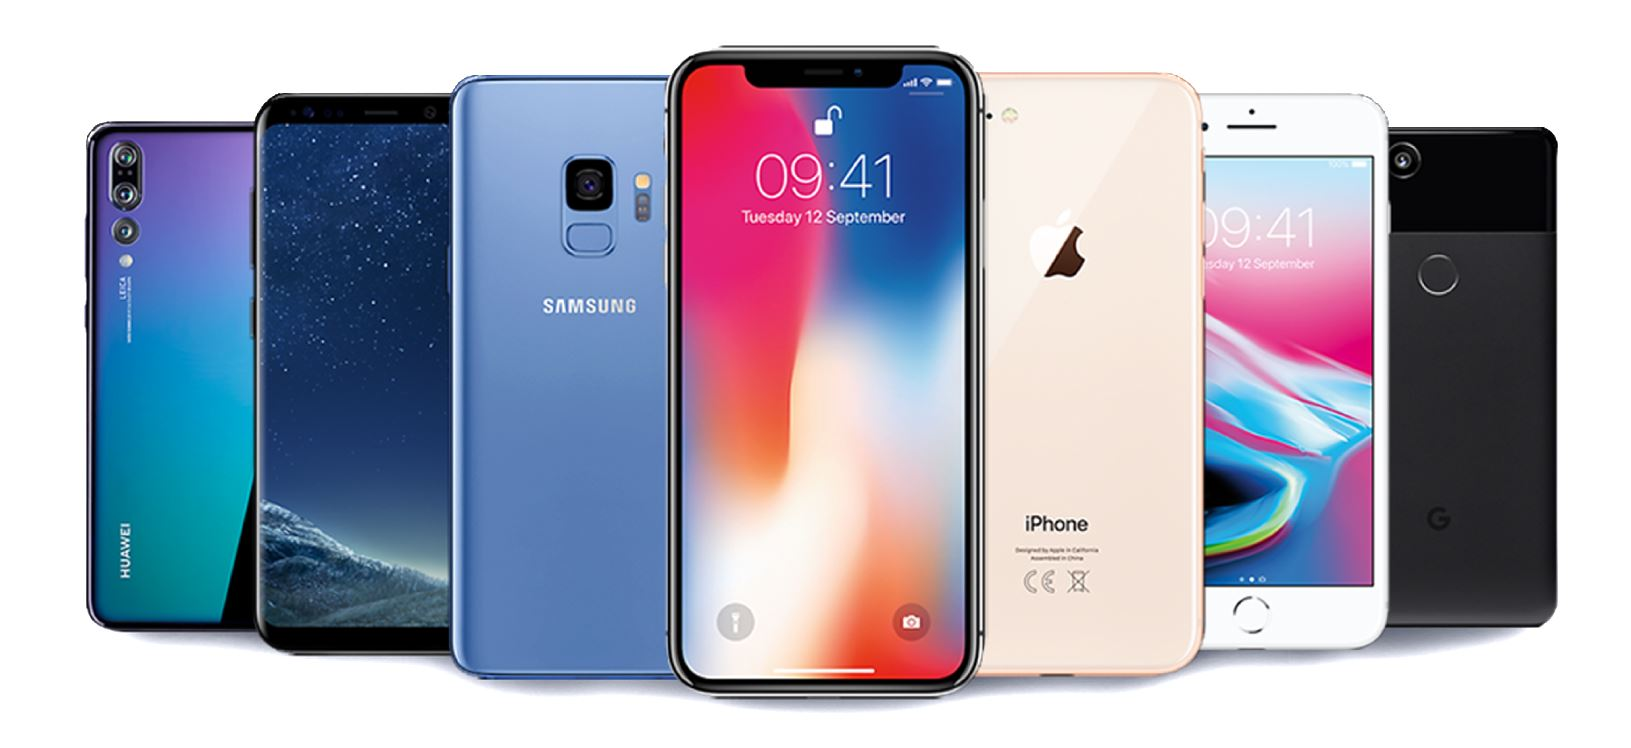

# Importing libraries and dataset


In [1]:
# Mounting drive  
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

# Look at data and data cleansing

In [6]:
# Taking a look over the dataset
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
# Checking the shape of the dataset
df.shape

(2000, 21)

In this dataset we have

* columns : 21
* Rows : 2000

------------------------------------------------------------------------

In [8]:
# Checking the features in the dataset
print('We have these features:\n',list(df.columns[:9]),'\n',list(df.columns[10:]))

We have these features:
 ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt'] 
 ['pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


So, in this dataset all the features are usefull because each feature has a unique impact on price.

---------------------------------------------------------------------------

In [9]:
# Let's check the info in which we will observe the types of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Here in this dataset all the data types are ok.

-------------------------------------------------------------------------

In [10]:
# Let's check for duplicate values
df.duplicated().sum()

0

The duplicate values are not present in this dataset.

----------------------------------------------------------------------

In [11]:
#checking percentage of missing values in a column
df.isnull().sum()/len(df)*100

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

From above results we can say that the dataset doesn't have any null values.

--------------------------------------------------------------------------

In [12]:
# Checking the description 
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
# Checking the skewness of variables
df.skew()

battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

Any of the variables do not have that much skewness.

------------------------------------------------------------------------


That's it.....!!!!!

Our data is ready for further operations.

------------------------------------------------------------------------

# Let's do some Feature Engineering

In [14]:
# Creating a new column which gives the screen size of the mobiles
df['mobile_sc_size']=df['sc_w']*df['sc_h']

* From two columns which are sc_w and sc_h we created a new column that is 'mobile_sc_size'.
* It gives the overall size of screens of mobiles.

------------------------------------------------------------------------------

In [15]:
# Deleting sc_w and sc_h columns
df.drop(['sc_w','sc_h'],inplace=True,axis=1)

# Let's do Exploratory Data Analysis.....
  Let's find some interesting insights.

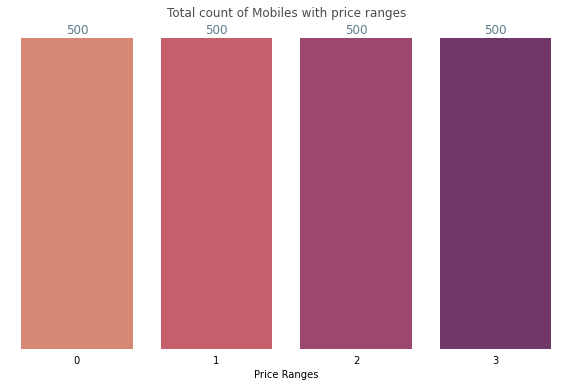

In [19]:
# Let's check the dependent variable first...
plt.figure(figsize=(10,6))


# Plotting the values in dependent variable
ax=sns.countplot(df['price_range'],palette='flare')

# make one bar, the python bar, a contrasting color
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')

# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Price Ranges", ylabel = "")
plt.title('Total count of Mobiles with price ranges',alpha=0.7)


plt.show()

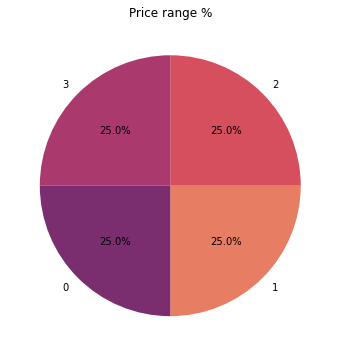

In [20]:
# Plotting a Pie chart for price ranges

#Creating list of seasons
a=df['price_range'].unique()

#Creating list of individual season count
b=df['price_range'].value_counts()

# Plotting a Pie chart
plt.figure(figsize=(10,6))
#explode=[0.1,0.1,0.1,0.1]
plt.pie(b, labels=a,colors=sns.color_palette("flare",4), 
        autopct="%.1f%%",shadow=False,startangle=270)
plt.title('Price range %')
# displaying chart
plt.show()

As we can see in our dataset there are 4 equally distributed data of mobile phone according to price_range:

* 0: low
* 1: medium
* 2: high
* 3: expensive

--------------------------------------------------------------------------

In [21]:
# Storing the categorical and numerical features 
Categorical_var=['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 
                 'wifi']
Numeric_var=['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 
             'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 
             'sc_h', 'sc_w', 'talk_time']

In [22]:
# Creating a function to plot the categorical variables 
def count_plot(hue,xlabel,title):
  # Let's check the dependent variable first...
  plt.figure(figsize=(10,6))
  
  # Plotting the values in dependent variable
  ax=sns.countplot(x='price_range',hue=hue,data=df, palette='flare')

  # make one bar, the python bar, a contrasting color
  for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12,color='#607B8B', 
                     xytext=(0, 8),
                     textcoords='offset points')

  # Removing all ticks and label
  plt.tick_params(top=False, bottom=False, left=False, right=False, 
                  labelleft=False, labelbottom=True)

  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  ax.set(xlabel=xlabel, ylabel = "")
  plt.title(title,alpha=0.7)
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)
  plt.grid(b=None,axis='both')

  plt.show()

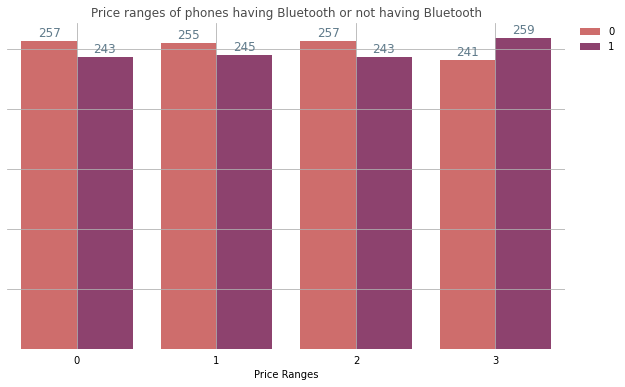

In [23]:
# Plotting the count of price ranges of mobiles which are having bluetooth support or not
count_plot('blue','Price Ranges','Price ranges of phones having Bluetooth or not having Bluetooth')

*  From this plot we can say that, for first three price ranges the count of mobiles which do not have bluetooth support is high as compared to the fourth price range.
* In fourth price range the count of mobiles is high which have bluetooth support.

---------------------------------------------------------------------------

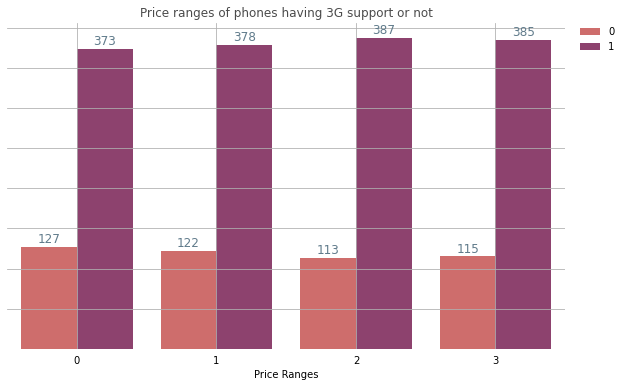

In [24]:
# Plotting price ranges of phones having 3G support or not
count_plot('three_g','Price Ranges','Price ranges of phones having 3G support or not')

* The above plot shows that the mobile phones which don't have 3G support are less in numbers in every ptice range.
* The mobile phones which have 3G support are maximum in numbers in each of the price range.

-------------------------------------------------------------------------


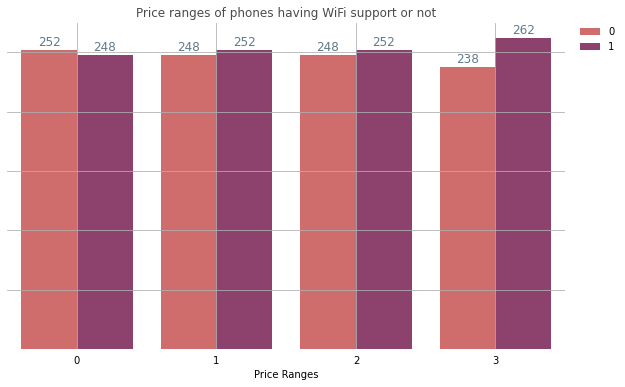

In [25]:
# Plotting the price ranges of phones which are having WiFi support or not having the support
count_plot('wifi','Price Ranges','Price ranges of phones having WiFi support or not')

* From this plot we can say that in each price range the WiFi support is available.
* The mobile phones which have WiFi support are approximately equal in each of the price range.

-----------------------------------------------------------------------

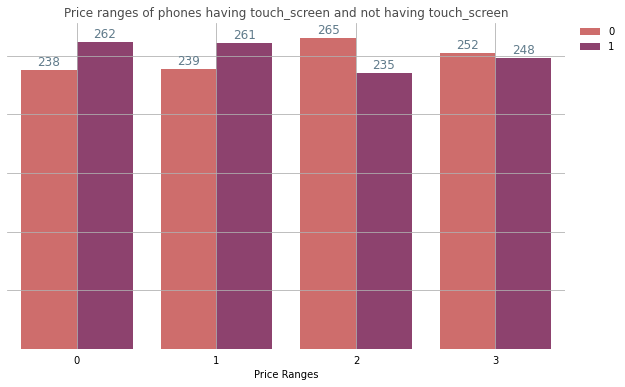

In [26]:
# Plotting price ranges of phones having touch_screen and not having touch_screen
count_plot('touch_screen','Price Ranges','Price ranges of phones having touch_screen and not having touch_screen')

* Above plot shows the count of mobiles having touch screen and mobiles which do not have touch screen from each of the price range.
* If we compare every price range according to touch screen function then we can say that in evry price range the number of mobiles are nearly equal.

----------------------------------------------------------------------------

Text(0.5, 1.0, 'Relation between Ram and Battery power of mobiles with Price Range')

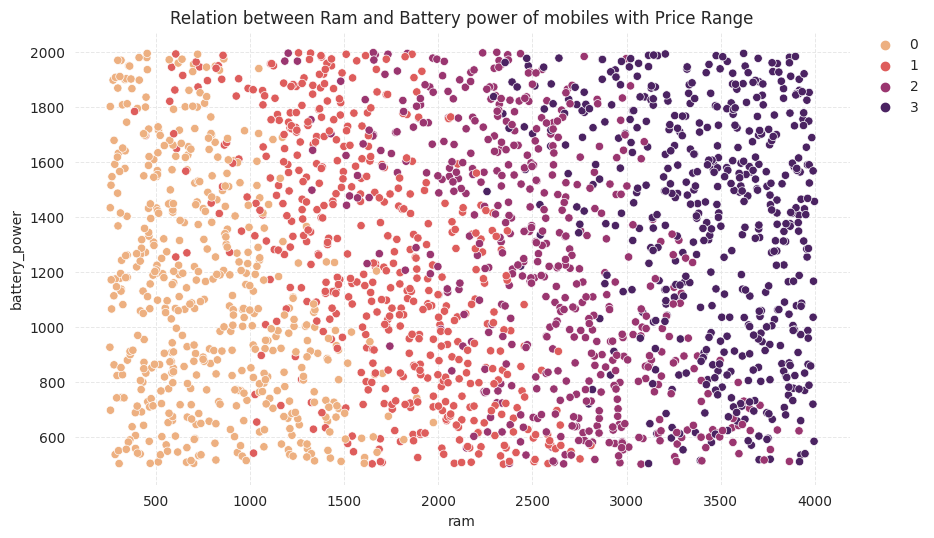

In [27]:
# Plotting relation between battery power and ram of mobiles with Price range
plt.figure(figsize=(10,6), dpi=100)
sns.set_style("whitegrid")

sns.scatterplot(data=df, x = df['ram'], y = 'battery_power', hue='price_range', 
            palette='flare')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)
plt.title('Relation between Ram and Battery power of mobiles with Price Range')

* The above scatter plot shows the relation of ram and battery power with respect to price range of mobiles.
* As we can see when the ram and battery power are less at that time price of that perticular mobile is also low.
* And when battery power and ram are high the price range is also high. 

---------------------------------------------------------------------------------

Text(0.5, 1.0, 'Relation between Ram and Internal Memory of mobiles with Price Range')

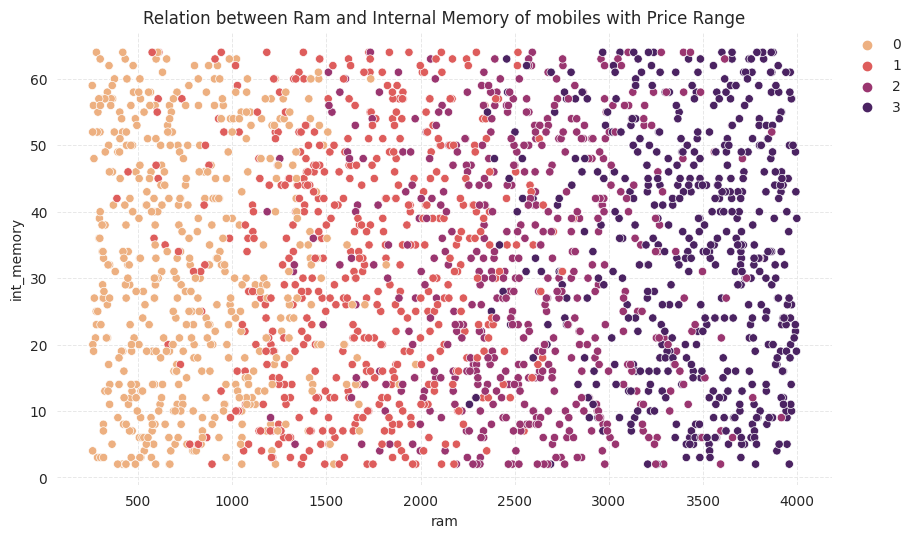

In [28]:
# Plotting battery power of mobiles with Price range
plt.figure(figsize=(10,6), dpi=100)
sns.set_style("whitegrid")

sns.scatterplot(data=df, x = df['ram'], y = 'int_memory', hue='price_range', 
            palette='flare')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',
             borderaxespad=0,frameon=False)
plt.title('Relation between Ram and Internal Memory of mobiles with Price Range')

In [29]:
# Creating a function to plot a line plot of numerical columns
def line_plot(y,title):

  plt.figure(figsize=(10,6), dpi=100)
  sns.set_style("whitegrid")

  sns.lineplot(data=df, x='price_range', y=y, 
              color='#8B3A62')
  # remove the frame of the chart
  for spine in plt.gca().spines.values():
      spine.set_visible(False)

  # Draw grid lines with red color and dashed style
  plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

  plt.title(title)

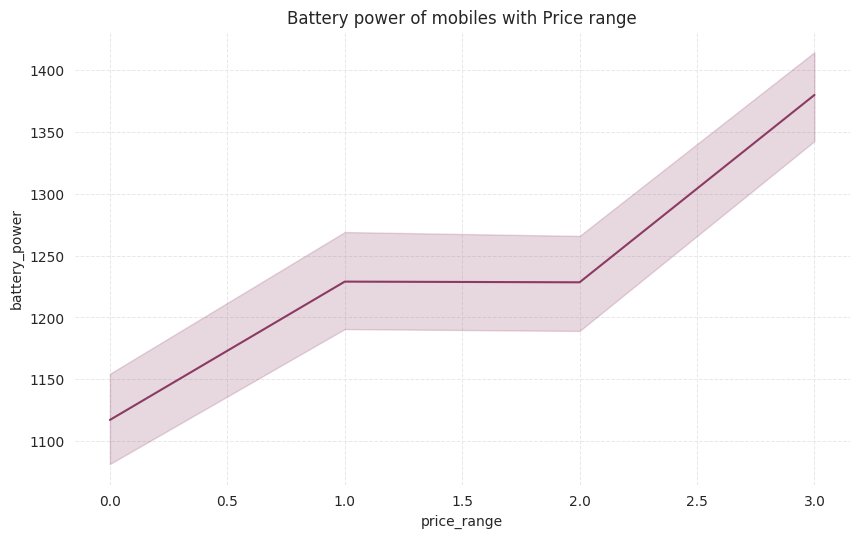

In [30]:
# Plotting battery power of mobiles with Price range
line_plot('battery_power','Battery power of mobiles with Price range')

* As the plot shows from 0 to 1 range price range of mobiles increases as battery power increases.
* From price range 1 to 2 there is a flat line that means the price range is constant in this price range.
* From price range 2 to 3 again price range starts to increase as there is increase in battery power.

---------------------------------------------------------------------------

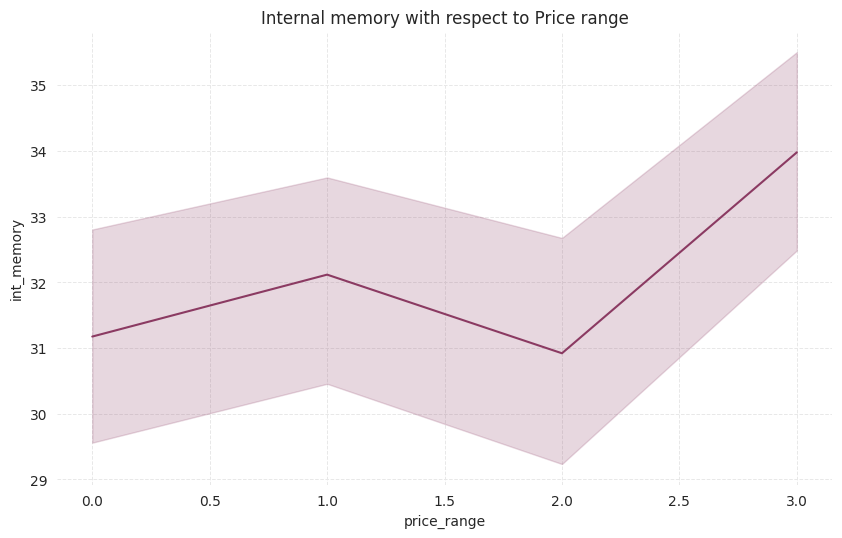

In [31]:
# Plotting rented bike count with respect to hour
line_plot('int_memory','Internal memory with respect to Price range')

* In this plot we can see that from range 0 to 1 price range of mobiles increases as internal memory increases.
* But in price range of 1 to 2 the internal memory is decreasing but on the contrary price range is increasing.
* And in price range of 2 to 3 there is again increase in memory as well as price range.

----------------------------------------------------------------------------

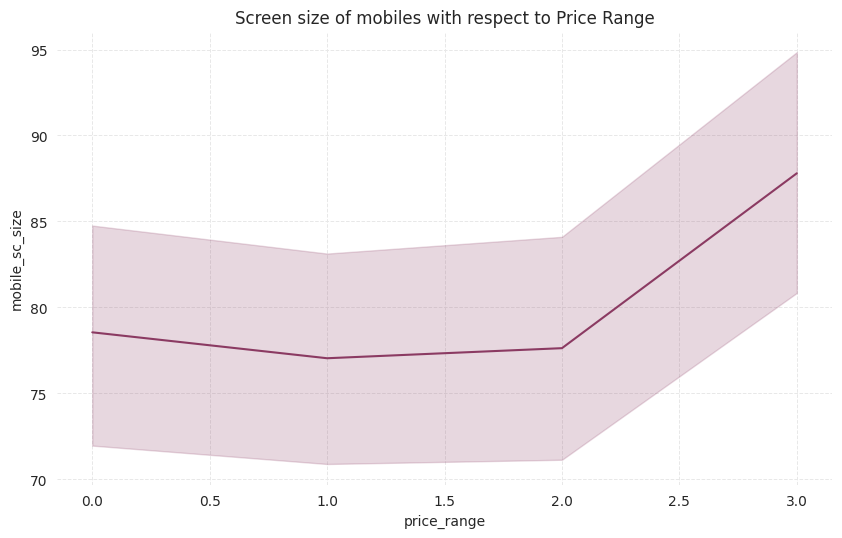

In [32]:
# Plotting the mobiles screen size with price range
line_plot('mobile_sc_size','Screen size of mobiles with respect to Price Range')

* From above plot we can observe that upto price range 2 the screen size is nearly constant.
* But after price range 2 the screen size start to increase.
* From this we can conclude that the mobile phones which have high screen area or size are more expensive.

---------------------------------------------------------------------------------

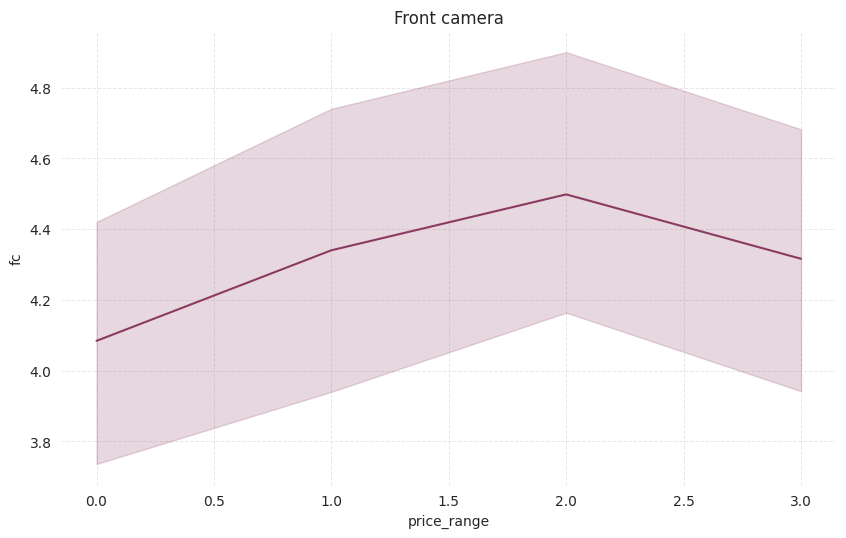

In [33]:
# Plotting the mobiles camera quality with price range
line_plot('fc','Front camera')

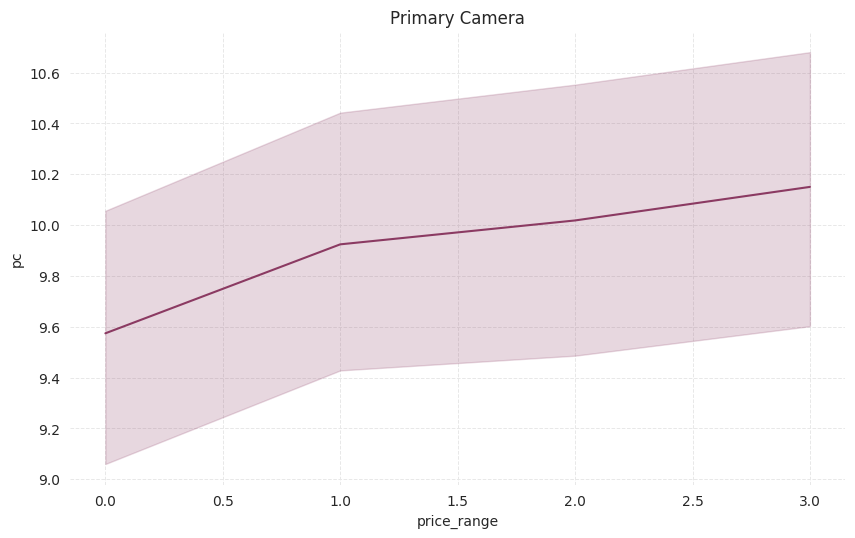

In [34]:
line_plot('pc','Primary Camera')

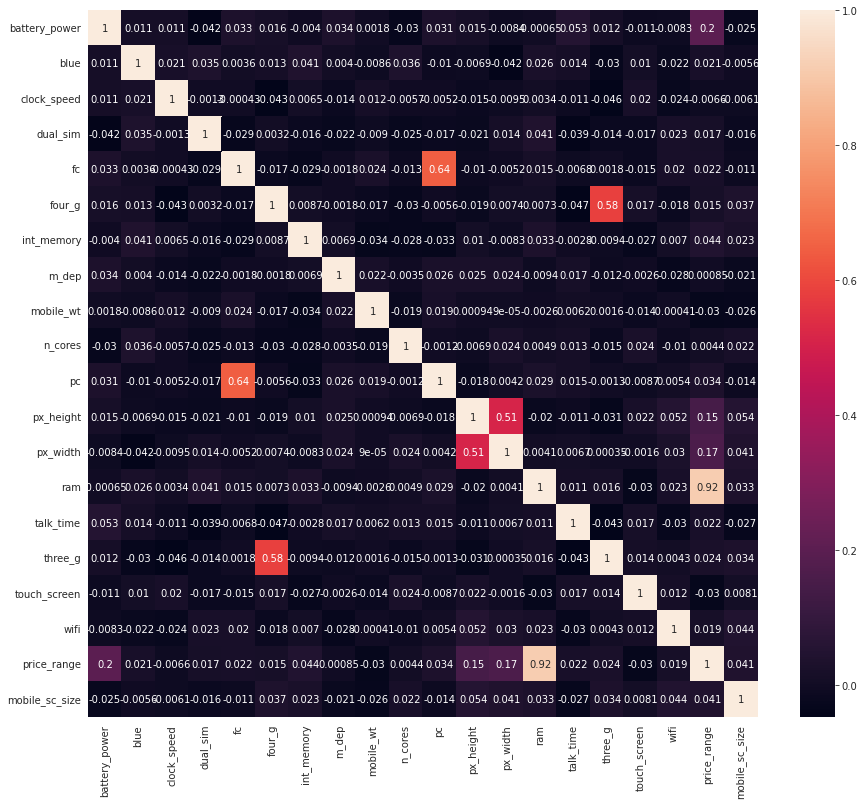

In [35]:
plt.figure(figsize=(15,13))
sns.heatmap(df.corr(),annot=True)

We have seen some important insights from above section. Now let's move ahead...!!!

--------------------------------------------------------------------------------